## render.ipynb
`simpleAIRRscene.xml`を使って光学素子の性能を変えながらAIRRの空中像をレンダリングします。

Mitsuba Renderer 3の以下のチュートリアルを参考にしています。
- [Mitsuba quickstart](https://mitsuba.readthedocs.io/en/stable/src/quickstart/mitsuba_quickstart.html)
- [Editing a scene](https://mitsuba.readthedocs.io/en/stable/src/rendering/editing_a_scene.html)

### インポートとバリアント選択

`mi.variants()`からコンパイルしたバリアント一覧が確認できます。

In [1]:

import mitsuba as mi
mi.set_variant("scalar_rgb")

jit_cuda_api_init(): could not find symbol "cuDevicePrimaryCtxRelease_v2" -- disabling CUDA backend!


In [2]:
import matplotlib.pyplot as plt
def show(img):
    plt.axis("off")
    plt.imshow(img ** (1.0 / 2.2))

シーンの読み込み

In [3]:
scene = mi.load_file("./simpleAIRRscene.xml")
spp = 1024

In [4]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  --------------------------------------------------------------------------------------------------
  Name                                           Flags    Type  Parent
  --------------------------------------------------------------------------------------------------
  PerspectiveCamera.near_clip                             float PerspectiveCamera
  PerspectiveCamera.far_clip                              float PerspectiveCamera
  PerspectiveCamera.shutter_open                          float PerspectiveCamera
  PerspectiveCamera.shutter_open_time                     float PerspectiveCamera
  PerspectiveCamera.film.size                             Vector2u HDRFilm
  PerspectiveCamera.film.crop_size                        Vector2u HDRFilm
  PerspectiveCamera.film.crop_offset                      Point2u HDRFilm
  PerspectiveCamera.x_fov                        ∂, D     float PerspectiveCamera
  PerspectiveCamera.to_world                     ∂, D     Transform4f Perspe

In [5]:
# 初期化
# 再帰反射材のroughnessを0.001、ハーフミラーを50R / 50、エリアライトの係数を1.0にする
def initScene(params):
    params["mat-reflector.alpha.value"]     = 0.001
    params["mat-half-mirror.reflectance"]   = 0.5
    params["mat-half-mirror.transmittance"] = 0.5
    params["displayed image.coefficient"]   = 1.0


### 再帰反射材の表面の粗さを変える

In [6]:
# 初期化
initScene(params)

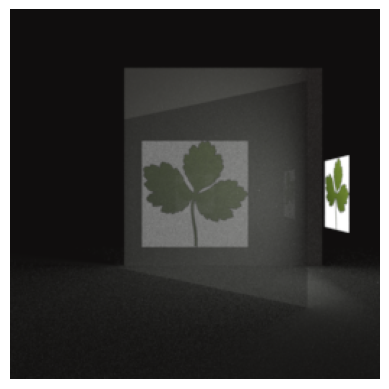

In [7]:
# すべて滑らかな面の場合
params["mat-reflector.alpha.value"] = 0.0
image = mi.render(scene, spp=spp)
show(image)

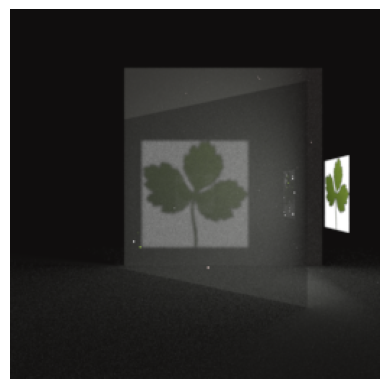

In [8]:
# alphaを増やすと空中像がぼけて描画される
params["mat-reflector.alpha.value"] = 0.001
image = mi.render(scene, spp=spp)
show(image)

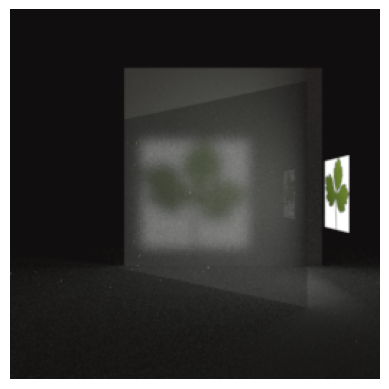

In [9]:
params["mat-reflector.alpha.value"] = 0.005
image = mi.render(scene, spp=spp)
show(image)

### ハーフミラーの性能を変える

In [10]:
# 初期化
initScene(params)

In [11]:
def set_hm_RT(params, reflectance, transmittance):
    params["mat-half-mirror.reflectance"] = reflectance
    params["mat-half-mirror.transmittance"] = transmittance

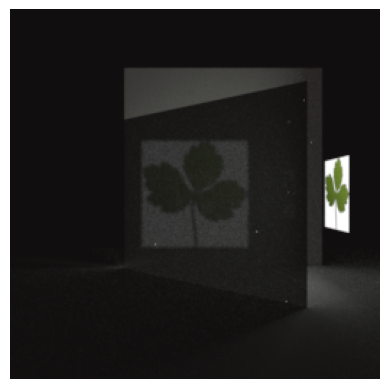

In [12]:
# 75R / 25T
[r, t] = [0.95, 0.05]

set_hm_RT(params, r, t)
image = mi.render(scene, spp=spp)
show(image)

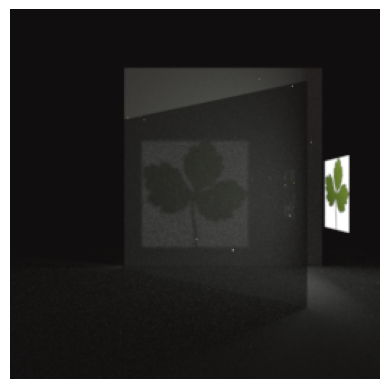

In [13]:
# 20R / 20T
[r, t] = [0.2, 0.2]

set_hm_RT(params, r, t)
image = mi.render(scene, spp=spp)
show(image)

### ディスプレイの明度を変える

In [14]:
# 初期化
initScene(params)

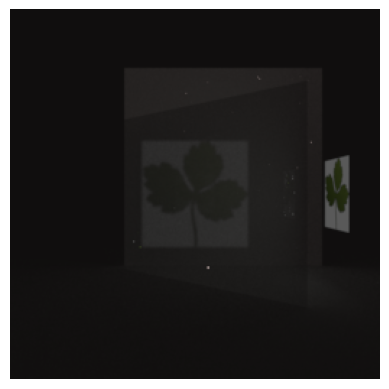

In [15]:
params["displayed image.coefficient"] = 0.1
image = mi.render(scene, spp=spp)
show(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


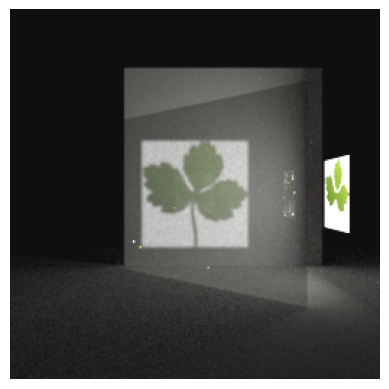

In [16]:
params["displayed image.coefficient"] = 3
image = mi.render(scene, spp=spp)
show(image)